In [1]:
#from sklearn.datasets import load_iris
from __future__ import print_function
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm

import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel as C
from matplotlib import font_manager, rc
from scipy.stats import multivariate_normal as mvn
import scipy as sp
from sklearn.mixture import GaussianMixture as GMM

from scipy import linalg
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from matplotlib.ticker import FormatStrFormatter
csfont = {'fontname':'Times New Roman'}

## Load Data

In [2]:
os.chdir(r'D:\Dropbox\0. HY\5. KBU_gait\00. Full data')
#os.chdir(r'C:\Users\gkdbs\Dropbox\0. HY\5. KBU_gait\00. Full data')

## Normal data #####################################################################################
dataset = pd.read_csv('normal_left_perc_x.csv', sep=',',header=None) #.dropna(axis=0)
nor_left_x_grf = np.transpose(dataset) 
dataset = pd.read_csv('normal_left_perc_y.csv', sep=',',header=None)
nor_left_y_grf = np.transpose(dataset)
dataset = pd.read_csv('normal_left_perc_z.csv', sep=',',header=None)
nor_left_z_grf = np.transpose(dataset)

dataset = pd.read_csv('mo_normal_left_perc_x.csv', sep=',',header=None) #.dropna(axis=0)
nor_left_x_mo = np.transpose(dataset)
dataset = pd.read_csv('mo_normal_left_perc_y.csv', sep=',',header=None)
nor_left_y_mo = np.transpose(dataset)
dataset = pd.read_csv('mo_normal_left_perc_z.csv', sep=',',header=None)
nor_left_z_mo = np.transpose(dataset)

dataset = pd.read_csv('normal_right_perc_x.csv', sep=',',header=None) #.dropna(axis=0)
nor_right_x_grf = np.transpose(dataset) #-np.mean(np.transpose(dataset))
dataset = pd.read_csv('normal_right_perc_y.csv', sep=',',header=None)
nor_right_y_grf = np.transpose(dataset)
dataset = pd.read_csv('normal_right_perc_z.csv', sep=',',header=None)
nor_right_z_grf = np.transpose(dataset)

dataset = pd.read_csv('mo_normal_right_perc_x.csv', sep=',',header=None) #.dropna(axis=0)
nor_right_x_mo = np.transpose(dataset)
dataset = pd.read_csv('mo_normal_right_perc_y.csv', sep=',',header=None)
nor_right_y_mo = np.transpose(dataset)
dataset = pd.read_csv('mo_normal_right_perc_z.csv', sep=',',header=None)
nor_right_z_mo = np.transpose(dataset)

out = 99
nor_left_x_mo = nor_left_x_mo.drop(columns=[out])
nor_left_y_mo = nor_left_y_mo.drop(columns=[out])
nor_left_z_mo = nor_left_z_mo.drop(columns=[out])
out = 99
nor_right_x_mo = nor_right_x_mo.drop(columns=[out])
nor_right_y_mo = nor_right_y_mo.drop(columns=[out])
nor_right_z_mo = nor_right_z_mo.drop(columns=[out])

nor_left_x_mo.columns = np.arange(nor_left_x_mo.shape[1])
nor_left_y_mo.columns = np.arange(nor_left_y_mo.shape[1])
nor_left_z_mo.columns = np.arange(nor_left_z_mo.shape[1])
nor_right_x_mo.columns = np.arange(nor_right_x_mo.shape[1])
nor_right_y_mo.columns = np.arange(nor_right_y_mo.shape[1])
nor_right_z_mo.columns = np.arange(nor_right_z_mo.shape[1])

nor_right_x_grf = -nor_right_x_grf
#nor_right_x_mo = -nor_right_x_mo
nor_right_y_mo = -nor_right_y_mo
nor_right_z_mo = -nor_right_z_mo

## Drop outliers (Left) #####################################################################################

out = 35
nor_left_x_grf = nor_left_x_grf.drop(columns=[out])
nor_left_y_grf = nor_left_y_grf.drop(columns=[out])
nor_left_z_grf = nor_left_z_grf.drop(columns=[out])
nor_left_x_mo = nor_left_x_mo.drop(columns=[out])
nor_left_y_mo = nor_left_y_mo.drop(columns=[out])
nor_left_z_mo = nor_left_z_mo.drop(columns=[out])

out = 43
nor_left_x_grf = nor_left_x_grf.drop(columns=[out])
nor_left_y_grf = nor_left_y_grf.drop(columns=[out])
nor_left_z_grf = nor_left_z_grf.drop(columns=[out])
nor_left_x_mo = nor_left_x_mo.drop(columns=[out])
nor_left_y_mo = nor_left_y_mo.drop(columns=[out])
nor_left_z_mo = nor_left_z_mo.drop(columns=[out])

nor_left_x_grf.columns = np.arange(nor_left_x_grf.shape[1])
nor_left_y_grf.columns = np.arange(nor_left_y_grf.shape[1])
nor_left_z_grf.columns = np.arange(nor_left_z_grf.shape[1])
nor_left_x_mo.columns = np.arange(nor_left_x_mo.shape[1])
nor_left_y_mo.columns = np.arange(nor_left_y_mo.shape[1])
nor_left_z_mo.columns = np.arange(nor_left_z_mo.shape[1])

## Drop outliers (Right) #####################################################################################

out = 35
nor_right_x_grf = nor_right_x_grf.drop(columns=[out])
nor_right_y_grf = nor_right_y_grf.drop(columns=[out])
nor_right_z_grf = nor_right_z_grf.drop(columns=[out])
nor_right_x_mo = nor_right_x_mo.drop(columns=[out])
nor_right_y_mo = nor_right_y_mo.drop(columns=[out])
nor_right_z_mo = nor_right_z_mo.drop(columns=[out])

out = 43
nor_right_x_grf = nor_right_x_grf.drop(columns=[out])
nor_right_y_grf = nor_right_y_grf.drop(columns=[out])
nor_right_z_grf = nor_right_z_grf.drop(columns=[out])
nor_right_x_mo = nor_right_x_mo.drop(columns=[out])
nor_right_y_mo = nor_right_y_mo.drop(columns=[out])
nor_right_z_mo = nor_right_z_mo.drop(columns=[out])

nor_right_x_grf.columns = np.arange(nor_right_x_grf.shape[1])
nor_right_y_grf.columns = np.arange(nor_right_y_grf.shape[1])
nor_right_z_grf.columns = np.arange(nor_right_z_grf.shape[1])
nor_right_x_mo.columns = np.arange(nor_right_x_mo.shape[1])
nor_right_y_mo.columns = np.arange(nor_right_y_mo.shape[1])
nor_right_z_mo.columns = np.arange(nor_right_z_mo.shape[1])

(101, 110) (101, 110) (101, 110) (101, 110) (101, 110) (101, 110)
(101, 110) (101, 110) (101, 110) (101, 110) (101, 110) (101, 110)


In [4]:
nor_mix_x_grf = np.transpose(np.transpose(nor_left_x_grf).append(np.transpose(nor_right_x_grf)))
nor_mix_y_grf = np.transpose(np.transpose(nor_left_y_grf).append(np.transpose(nor_right_y_grf)))
nor_mix_z_grf = np.transpose(np.transpose(nor_left_z_grf).append(np.transpose(nor_right_z_grf)))
nor_mix_x_mo = np.transpose(np.transpose(nor_left_x_mo).append(np.transpose(nor_right_x_mo)))
nor_mix_y_mo = np.transpose(np.transpose(nor_left_y_mo).append(np.transpose(nor_right_y_mo)))
nor_mix_z_mo = np.transpose(np.transpose(nor_left_z_mo).append(np.transpose(nor_right_z_mo)))

nor_mix_x_grf.columns = np.arange(nor_mix_x_grf.shape[1])
nor_mix_y_grf.columns = np.arange(nor_mix_y_grf.shape[1])
nor_mix_z_grf.columns = np.arange(nor_mix_z_grf.shape[1])
nor_mix_x_mo.columns = np.arange(nor_mix_x_mo.shape[1])
nor_mix_y_mo.columns = np.arange(nor_mix_y_mo.shape[1])
nor_mix_z_mo.columns = np.arange(nor_mix_z_mo.shape[1])


## PCA

In [10]:
nor_VAFs_mix = pd.DataFrame(np.zeros((nor_mix_x_grf.shape[1], 6)))

nor_u_tot_mix = np.zeros((nor_mix_x_grf.shape[1],101,6))
nor_vh_tot_mix = np.zeros((nor_mix_x_grf.shape[1],6,6))
nor_s_tot_mix = np.zeros((nor_mix_x_grf.shape[1], 6))

for subject_n in np.arange(nor_mix_x_grf.shape[1]):
    inputdata = pd.DataFrame(np.zeros((101, 6)))
    inputdata[0] = nor_mix_x_grf[subject_n]
    inputdata[1] = nor_mix_y_grf[subject_n]
    inputdata[2] = nor_mix_z_grf[subject_n]
    inputdata[3] = nor_mix_x_mo[subject_n]
    inputdata[4] = nor_mix_y_mo[subject_n]
    inputdata[5] = nor_mix_z_mo[subject_n]
    
    scaler = StandardScaler()
    scaler.fit(inputdata)
    inputdata = scaler.transform(inputdata)
    
    # snorial norterns (eigenvectors) : vh 
    # temporal norterns : u*s
    u_mix, s_mix, vh_mix = np.linalg.svd(inputdata, full_matrices=False)
    
    nor_u_tot_mix[subject_n,:,:] = u_mix
    nor_vh_tot_mix[subject_n,:,:] = vh_mix                                  
    nor_s_tot_mix[subject_n,:] = s_mix
    
    # VAF (accounted variance)
    nor_VAF_1_mix = np.sum(s_mix[0]**2)/np.sum(s_mix**2)
    nor_VAF_2_mix = np.sum(s_mix[1]**2)/np.sum(s_mix**2)
    nor_VAF_3_mix = np.sum(s_mix[2]**2)/np.sum(s_mix**2)
    nor_VAF_4_mix = np.sum(s_mix[3]**2)/np.sum(s_mix**2)
    nor_VAF_5_mix = np.sum(s_mix[4]**2)/np.sum(s_mix**2)
    nor_VAF_6_mix = np.sum(s_mix[5]**2)/np.sum(s_mix**2)

    nor_VAFs_mix.iloc[subject_n, 0] = nor_VAF_1_mix
    nor_VAFs_mix.iloc[subject_n, 1] = nor_VAF_2_mix   
    nor_VAFs_mix.iloc[subject_n, 2] = nor_VAF_3_mix   
    nor_VAFs_mix.iloc[subject_n, 3] = nor_VAF_4_mix   
    nor_VAFs_mix.iloc[subject_n, 4] = nor_VAF_5_mix   
    nor_VAFs_mix.iloc[subject_n, 5] = nor_VAF_6_mix    
    
print(u_mix.shape, s_mix.shape, vh_mix.shape)
print(nor_u_tot_mix.shape, nor_s_tot_mix.shape, nor_vh_tot_mix.shape)

(101, 6) (6,) (6, 6)
(220, 101, 6) (220, 6) (220, 6, 6)


Text(0, 0.5, 'Variance (%)')

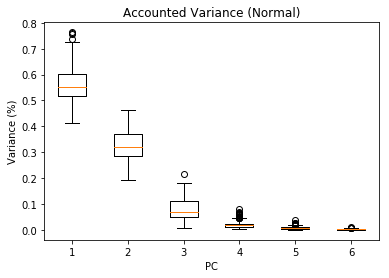

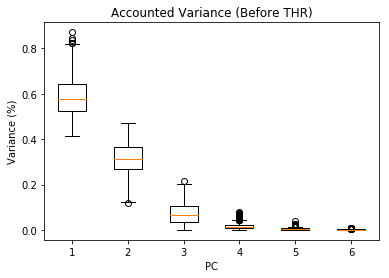

In [12]:

fig, ax3 = plt.subplots()
ax3.set_title('Accounted Variance (Normal)')
ax3.boxplot(nor_VAFs_mix.transpose())
ax3.set_xlabel('PC')
ax3.set_ylabel('Variance (%)')

(220, 101, 6) (220, 6) (220, 6, 6)
(101, 6) (6,) (6, 6)


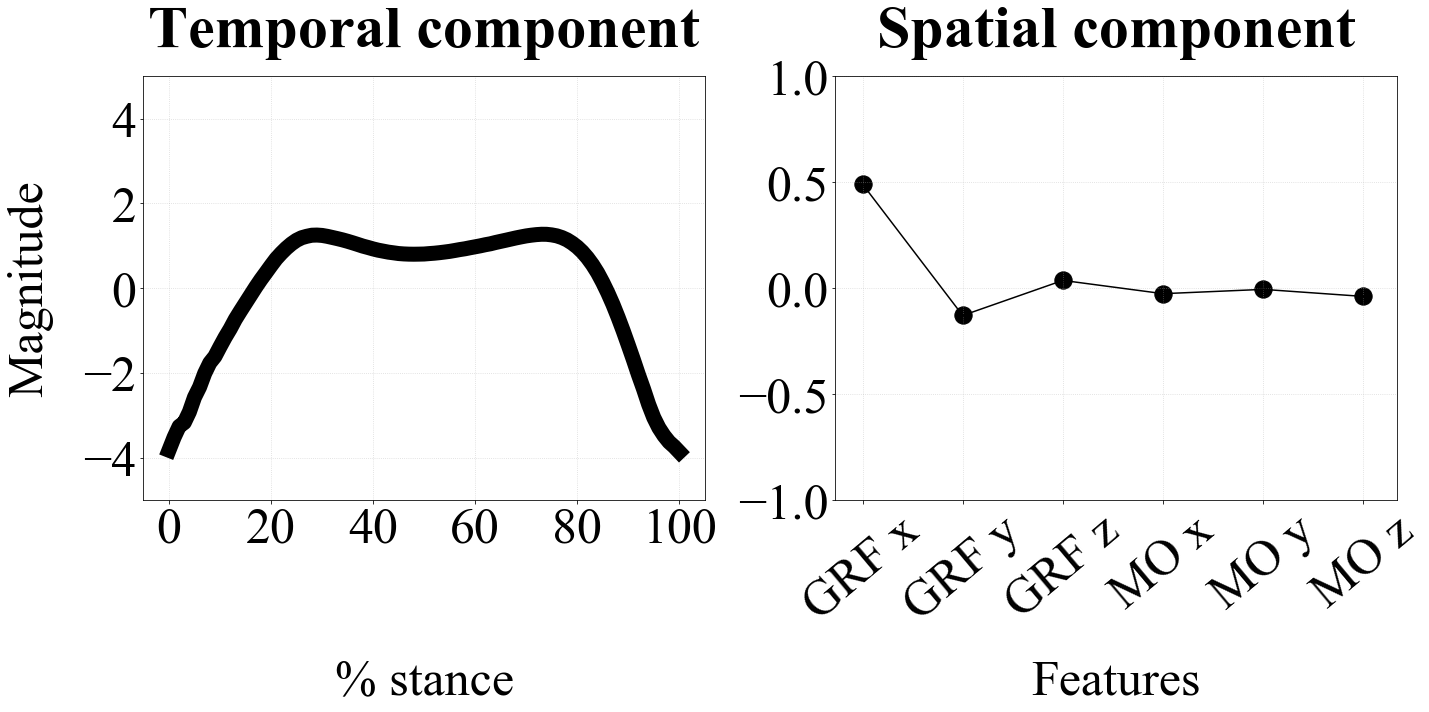

In [13]:
print(nor_u_tot_mix.shape, nor_s_tot_mix.shape, nor_vh_tot_mix.shape)
nor_u_mix_mean = np.mean(nor_u_tot_mix, axis=0)
nor_s_mix_mean = np.mean(nor_s_tot_mix, axis = 0)
nor_vh_mix_mean = np.mean(nor_vh_tot_mix, axis=0)
print(nor_u_mix_mean.shape, nor_s_mix_mean.shape, nor_vh_mix_mean.shape)
###################################################################
fig = plt.figure(figsize = (20,10))

titlesize = 60
labelsize = 50
ticksize = 50
labelpad = 30
dotsize = 300
legendsize = 50
rotationangle = 40
lw = 15

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Temporal component', fontname="Times new roman", size=titlesize, pad = labelpad, fontweight='bold')
ax.set_xlabel('% stance', size = labelsize,fontname="Times new roman", labelpad = labelpad)
ax.set_ylabel('Magnitude', size = labelsize,fontname="Times new roman", labelpad = labelpad)
#for i in np.arange(nor_u_mix_mean.shape[0]):  
#    ax.scatter(i, nor_u_mix_mean[i][0]*nor_s_mix_mean[0], c='k',marker = "d", s= dotsize) 
ax.plot(nor_u_mix_mean[:,0]*nor_s_mix_mean[0], c='k', linewidth = lw) 
#    if nor_u_mix_mean[i][0]*nor_s_mix_mean[0] > 0:
#        print(i)
ax.set_xlim([-5, 105])
ax.set_ylim([-5, 5])        
plt.xticks(fontname = "Times new roman", size = ticksize)
plt.yticks(fontname = "Times new roman", size = ticksize)
plt.grid(ls = ':', alpha = 0.5)

ax = fig.add_subplot(1, 2, 2)
ax.set_title('Spatial component', fontname="Times new roman", size=titlesize, pad = labelpad, fontweight='bold')
ax.set_xlabel('Features', size = labelsize,fontname="Times new roman", labelpad = labelpad)
#ax.set_ylabel('Magnitude', size = labelsize,fontname="Times New Roman")
for i in np.arange(nor_vh_mix_mean.shape[0]):  
    ax.scatter(i, nor_vh_mix_mean[i][0], c='k',marker = "o", s= dotsize) 
ax.plot(nor_vh_mix_mean[:,0], c='k') 

ax.set_ylim([-1, 1])        
plt.xticks(np.arange(6), (['GRF x','GRF y', 'GRF z', 'MO x', 'MO y', 'MO z']),
           fontname = "Times new roman", size = ticksize, rotation = rotationangle)
plt.yticks([-1, -0.5, 0, 0.5, 1], fontname = "Times new roman", size = ticksize)

plt.grid(ls = ':', alpha = 0.5)
fig.tight_layout()
fig.align_labels()


## GMM

In [36]:
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()    
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance) # SVD 사용 for PCA
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    w_factor = 0.2 / gmm.weights_.max()
    #for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)
        print(pos, covar)
    #return labels
    
def get_gmm_vals(gmm, X, data_dimension, number_of_gaussian, label=True, ax=None):
    pos_full = np.zeros((number_of_gaussian,data_dimension))
    covar_full = np.zeros((number_of_gaussian,data_dimension,data_dimension))

    labels = gmm.fit(X).predict(X)
    w_factor = 0.2 / gmm.weights_.max()
    #for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
    i = 0
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        pos_full[i,:] = pos
        covar_full[i,:,:] = covar
        i = i+1
    return pos_full, covar_full

def get_gmm_vals(gmm, X, data_dimension, number_of_gaussian, label=True, ax=None):
    pos_full = np.zeros((number_of_gaussian,data_dimension))
    covar_full = np.zeros((number_of_gaussian,data_dimension,data_dimension))

    labels = gmm.fit(X).predict(X)
    w_factor = 0.2 / gmm.weights_.max()
    #for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
    i = 0
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        pos_full[i,:] = pos
        covar_full[i,:,:] = covar
        i = i+1
    return pos_full, covar_full

def get_gmm_labels(gmm, X, data_dimension, number_of_gaussian, label=True, ax=None):
    pos_full = np.zeros((number_of_gaussian,data_dimension))
    covar_full = np.zeros((number_of_gaussian,data_dimension,data_dimension))

    labels = gmm.fit(X).predict(X)
    return labels

In [16]:
print(mix_u_tot_both.shape)
print(mix_s_tot_both.shape)
print(mix_vh_tot_both.shape)

u_1_mix = mix_u_tot_both[:,:,0]
vh_1_mix = mix_vh_tot_both[:,0,:]

u_1_mix_mean = np.mean(u_1_mix, axis=0)
vh_1_mix_mean = np.mean(vh_1_mix, axis=0)

(485, 101, 6)
(485, 6)
(485, 6, 6)


# Spatial grouping

### Select number of Gaussians (G = 4)

(220, 6)
[-1900.6911623687956, -2110.0054122742486, -2219.3344627361357, -2393.7925340423826, -2449.8980319621287, -2379.1987954657534]


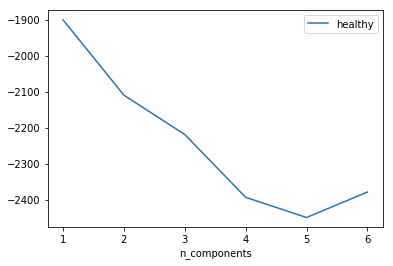

In [20]:
fit_data = vh_1_mix[0:nor_mix_x_grf.shape[1],:]
print(fit_data.shape)
#fit_data = np.array(fit_data).reshape(-1, 1)
#fit_data.shape

#scaler = MinMaxScaler()
#scaler.fit(fit_data)
#scaled_fit_data = scaler.transform(fit_data)

#fit_data = scaled_fit_data

from sklearn.mixture import GaussianMixture as GMM_scikit

n_components = np.arange(1, 7)
models = [GMM_scikit(n, covariance_type='full', random_state=0).fit(fit_data)
          for n in n_components]

plt.plot(n_components, [m.bic(fit_data) for m in models], label='BIC')
#plt.plot(n_components, [m.aic(fit_data) for m in models], label='AIC')
plt.legend(['healthy'],loc='best')
plt.xlabel('n_components');

print([m.bic(fit_data) for m in models])

### Make GMM (healthy)

In [50]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    ax = ax or plt.gca()    
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance) # SVD 사용 for PCA
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height, angle, facecolor= 'steelblue',**kwargs))
###################################################################

fit_data = vh_1_mix[0:nor_mix_x_grf.shape[1],:]
fit_data = np.array(fit_data)
fit_data.shape

###################################################################
number_of_gaussian = 5
data_dimension = 6
gmm_lib= GMM(n_components=number_of_gaussian, covariance_type='full', random_state=0)
pos, covar = get_gmm_vals(gmm_lib, fit_data, data_dimension, number_of_gaussian, label=False)
labels = get_gmm_labels(gmm_lib, fit_data, data_dimension, number_of_gaussian, label=False)

centers = pos
model = gmm_lib
nor_labels = labels

In [24]:
center_full_nor = np.zeros((number_of_gaussian,data_dimension))
w_full_nor = np.zeros((number_of_gaussian,1))
i = 0
for pos, covar, w in zip(model.means_, model.covariances_, model.weights_):
    center_full_nor[i,:] = pos
    w_full_nor[i,:] = w
    i = i+1

In [25]:
np.transpose(round(pd.DataFrame(center_full_nor),2))

,0,1,2,3,4
0,0.48,0.50,0.49,0.53,0.47
1,-0.19,0.12,-0.28,0.18,0.30
2,-0.49,-0.50,-0.48,-0.53,-0.47
3,-0.36,0.37,-0.26,-0.01,0.40
4,-0.49,-0.46,-0.46,-0.51,-0.38
5,-0.27,0.30,0.31,-0.31,-0.31


In [26]:
np.transpose(round(pd.DataFrame(w_full_nor),2))

,0,1,2,3,4
0,0.24,0.28,0.17,0.14,0.17


### Plot GMM (Healthy)

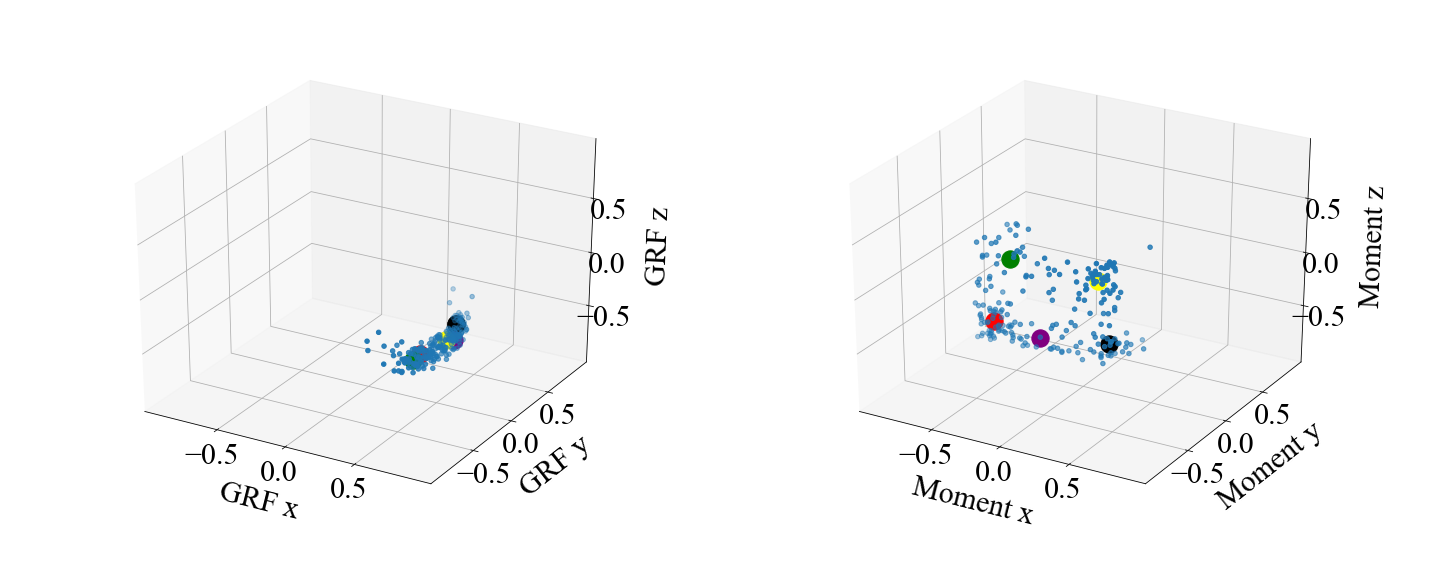

In [28]:
labelsize = 30
labelpad = 30
ticksize = 30
centersize = 300

fig = plt.figure(figsize = (20,8))

ax = fig.add_subplot(121, projection='3d')
x = vh_1_mix[0:nor_mix_x_grf.shape[1],0] # GRF X
y = vh_1_mix[0:nor_mix_x_grf.shape[1],1] # GRF Y
z = vh_1_mix[0:nor_mix_x_grf.shape[1],2] # GRF Z
ax.scatter(x, y, z)
colorss = ['r','yellow','green','purple','k']
for cc in np.arange(number_of_gaussian):
    x = centers[cc,0]
    y = centers[cc,1]
    z = centers[cc,2]
    ax.scatter(x,y,z,c=colorss[cc],s = centersize)
ax.scatter(x,y,z,c='k',s = centersize)
ax.set_xlabel('GRF x',size = labelsize,labelpad = labelpad, fontname="Times New Roman")
ax.set_ylabel('GRF y',size = labelsize,labelpad = labelpad,fontname="Times New Roman")
ax.set_zlabel('GRF z',size = labelsize,labelpad = labelpad,fontname="Times New Roman")
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))
for tick in ax.get_zticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(ticksize)
ax.set_zticks([-0.5,0,0.5])
plt.xticks([-0.5,0,0.5],fontname = "Times New Roman", size = ticksize)
plt.yticks([-0.5,0,0.5],fontname = "Times New Roman", size = ticksize)
ax.dist = 12

ax = fig.add_subplot(122, projection='3d')
x = vh_1_mix[0:nor_mix_x_grf.shape[1],3] # GRF X
y = vh_1_mix[0:nor_mix_x_grf.shape[1],4] # GRF Y
z = vh_1_mix[0:nor_mix_x_grf.shape[1],5] # GRF Z
ax.scatter(x, y, z)
colorss = ['r','yellow','green','purple','k']
for cc in np.arange(number_of_gaussian):
    x = centers[cc,3]
    y = centers[cc,4]
    z = centers[cc,5]
    ax.scatter(x,y,z,c=colorss[cc],s = centersize)
ax.set_xlabel('Moment x',size = labelsize,labelpad = labelpad, fontname="Times New Roman")
ax.set_ylabel('Moment y',size = labelsize,labelpad = labelpad,fontname="Times New Roman")
ax.set_zlabel('Moment z',size = labelsize,labelpad = labelpad,fontname="Times New Roman")
ax.set_xlim((-1, 1))
ax.set_ylim((-1, 1))
ax.set_zlim((-1, 1))

for tick in ax.get_zticklabels():
    tick.set_fontname("Times New Roman")
    tick.set_fontsize(ticksize)
ax.set_zticks([-0.5,0,0.5])
plt.xticks([-0.5,0,0.5],fontname = "Times New Roman", size = ticksize)
plt.yticks([-0.5,0,0.5],fontname = "Times New Roman", size = ticksize)
ax.dist = 12
fig.tight_layout()

#os.chdir(r'D:\Dropbox\0. HY\9. GMM\gait_pca_gmm_figs')
#fig.savefig('normal_pca_gmm_clusters_3d.pdf', bbox_inches = "tight")


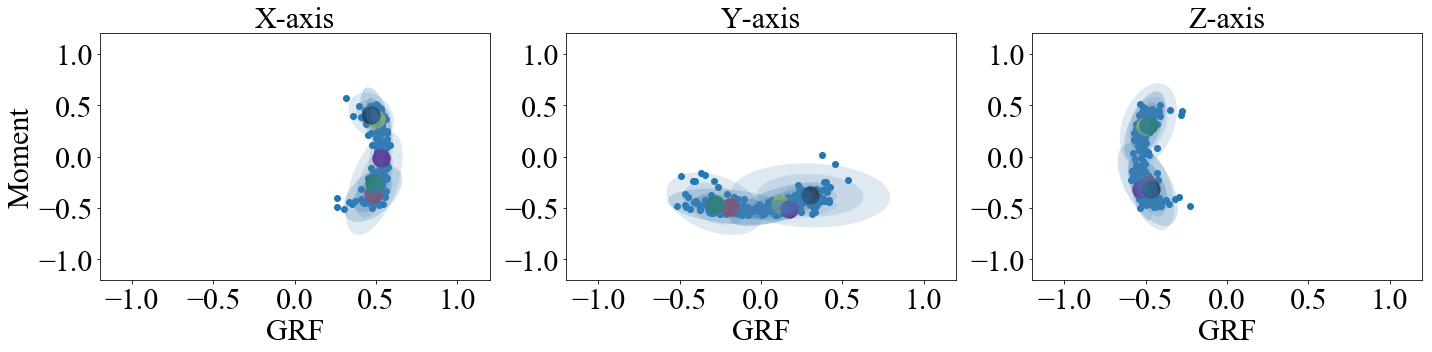

In [29]:
fig = plt.figure(figsize = (20,5))
labelsize = 30
fit_data = vh_1_mix[0:nor_mix_x_grf.shape[1],:]

ax = fig.add_subplot(1,3,1)
w_factor = 0.2 / model.weights_.max()
for pos, covar, w in zip(model.means_, model.covariances_, model.weights_):
    pos = pos[[0,3]]
    covar = covar[[0,3],:]
    covar = covar[:,[0,3]]   
    draw_ellipse(pos, covar, alpha = w)

x = fit_data[:,0] # GRF X
y = fit_data[:,3] # MO X
ax.scatter(x, y)
for i in np.arange(number_of_gaussian):
    x = centers[i,0]
    y = centers[i,3]
    ax.scatter(x,y,c=colorss[i],s = centersize)

ax.set_xlabel('GRF',size = labelsize,fontname="Times New Roman")
ax.set_ylabel('Moment',size = labelsize,fontname="Times New Roman")
ax.set_title('X-axis',size = labelsize,fontname="Times New Roman")
ax.set_xlim((-1.2, 1.2))
ax.set_ylim((-1.2, 1.2))
plt.xticks([-1,-0.5,0,0.5,1],fontname = "Times New Roman", size = ticksize)
plt.yticks([-1,-0.5,0,0.5,1],fontname = "Times New Roman", size = ticksize)

ax1 = fig.add_subplot(1,3,2)
w_factor = 0.2 / model.weights_.max()
for pos, covar, w in zip(model.means_, model.covariances_, model.weights_):
    pos = pos[[1,4]]
    covar = covar[[1,4],:]
    covar = covar[:,[1,4]]   
    draw_ellipse(pos, covar, alpha = w)
    
x = fit_data[:,1] # GRF X
y = fit_data[:,4] # MO X
ax1.scatter(x, y)
for i in np.arange(number_of_gaussian):
    x = centers[i,1]
    y = centers[i,4]
    ax1.scatter(x,y,c=colorss[i], s= centersize)

ax1.set_xlabel('GRF',size = labelsize,fontname="Times New Roman")
ax1.set_title('Y-axis',size = labelsize,fontname="Times New Roman")
ax1.set_xlim((-1.2, 1.2))
ax1.set_ylim((-1.2, 1.2))
plt.xticks([-1,-0.5,0,0.5,1],fontname = "Times New Roman", size = ticksize)
plt.yticks([-1,-0.5,0,0.5,1],fontname = "Times New Roman", size = ticksize)

ax2 = fig.add_subplot(1,3,3)
w_factor = 0.2 / model.weights_.max()
for pos, covar, w in zip(model.means_, model.covariances_, model.weights_):
    pos = pos[[2,5]]
    covar = covar[[2,5],:]
    covar = covar[:,[2,5]]   
    draw_ellipse(pos, covar, alpha = w)
    
x = fit_data[:,2] # GRF X
y = fit_data[:,5] # MO X
ax2.scatter(x, y)
for i in np.arange(number_of_gaussian):
    x = centers[i,2]
    y = centers[i,5]
    ax2.scatter(x,y,c=colorss[i],s = centersize)

ax2.set_xlabel('GRF',size = labelsize,fontname="Times New Roman")
ax2.set_title('Z-axis',size = labelsize,fontname="Times New Roman")
ax2.set_xlim((-1.2, 1.2))
ax2.set_ylim((-1.2, 1.2))
plt.xticks([-1,-0.5,0,0.5,1],fontname = "Times New Roman", size = ticksize)
plt.yticks([-1,-0.5,0,0.5,1],fontname = "Times New Roman", size = ticksize)

fig.tight_layout()

#os.chdir(r'D:\Dropbox\0. HY\9. GMM\gait_pca_gmm_figs')
#fig.savefig('normal_pca_gmm_clusters_2d.pdf')